In [5]:
# built-in src
import os

import keras
import numpy as np
# third-party src
from keras import callbacks, models
import keras_tuner as kt
# project src
from src.data_aug import data_aug_with_random_contrast
from src.ranking_model_prob import create_meta_network

# Prepare datasets

In [6]:
# Configure question index
question_index = str(1)

# Load training data
training_data_path = r'D:\zluo033\DNNTraining\data\datasets\training_data\no_pref_removed'
img_left_training = np.load(os.path.join(training_data_path + '/train_left_duel_' + question_index + '.npy'), allow_pickle=True)
img_right_training = np.load(os.path.join(training_data_path + '/train_right_duel_' + question_index + '.npy'), allow_pickle=True)
label_training = np.load(os.path.join(training_data_path + '/train_label_duel_' + question_index + '.npy'), allow_pickle=True)

# Load validation data
validation_data_path = r'D:\zluo033\DNNTraining\data\datasets\validation_data\no_pref_removed'
img_left_validation = np.load(os.path.join(validation_data_path + '/val_left_duel_' + question_index + '.npy'), allow_pickle=True)
img_right_validation = np.load(os.path.join(validation_data_path + '/val_right_duel_' + question_index + '.npy'), allow_pickle=True)
label_validation = np.load(os.path.join(validation_data_path + '/val_label_duel_' + question_index + '.npy'), allow_pickle=True)

# Load test data
test_data_path = r'D:\zluo033\DNNTraining\data\datasets\test_data\no_pref_removed'
img_left_test = np.load(os.path.join(test_data_path + '/test_left_duel_' + question_index + '.npy'), allow_pickle=True)
img_right_test = np.load(os.path.join(test_data_path + '/test_right_duel_' + question_index + '.npy'), allow_pickle=True)
label_test = np.load(os.path.join(test_data_path + '/test_label_duel_' + question_index + '.npy'), allow_pickle=True)

In [7]:
# Data augmentation using random contrast
img_left_training,img_right_training,label_training = data_aug_with_random_contrast(img_left_training,img_right_training, label_training,save_folder=None)

# Train the model

In [8]:
# Load the model configurations from hypermodel results
hypermodel_result_dir = 'HyperModels/ranking_hypermodels/hyperband_search_results/best_hypermodel_1.h5'
model = models.load_model(hypermodel_result_dir)
model.summary()

Model: "Meta_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_21 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Scoring_model (Functional)     (None, 1)            33137217    ['input_20[0][0]',               
                                                                  'input_21[0][0]']      

In [0]:
# Train the model and plot the training accuracy and loss
model.compile(
    optimizer=model.optimizer,
    loss=model.loss,
    metrics=['accuracy']
)

early_stopping = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    mode='min',
    restore_best_weights=True
)

history = model.fit(
    x=[img_left_training, img_right_training],
    y=label_training,
    epochs=50,
    batch_size=32,
    validation_data=([img_left_validation, img_right_validation], label_validation),
    callbacks=[early_stopping]
)

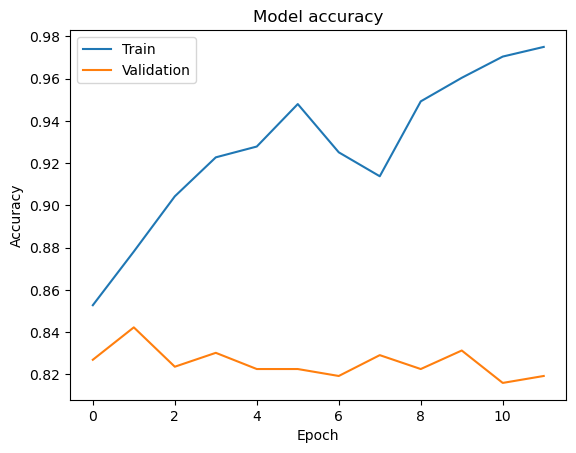

In [11]:

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

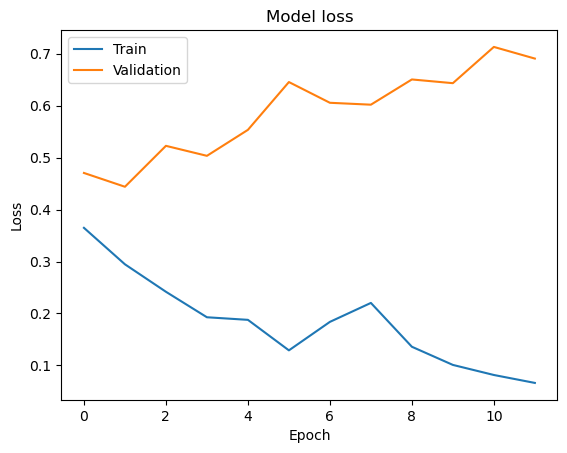

In [12]:

# plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')